In [58]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib as plt
import pylab as pl

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [59]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [61]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()


In [62]:
#  3. Convert the June temperatures to a list.
June_temps_list = [temp[1] for temp in June_temps]

In [63]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temps_list_df = pd.DataFrame(June_temps_list)
June_temps_list_df.rename(columns={ 0 :"June Temps"}, inplace=True)

In [64]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temps_list_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [65]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
December_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()


In [66]:
# 7. Convert the December temperatures to a list.
December_temps_list = [temp[1] for temp in  December_temps]

In [67]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
December_temps_list_df = pd.DataFrame(December_temps_list)
December_temps_list_df.rename(columns={ 0 :"December Temps"}, inplace=True)

In [68]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
December_temps_list_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


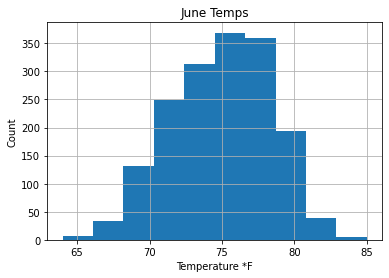

In [69]:
June_temps_list_df.hist()
pl.xlabel("Temperature *F")
pl.ylabel("Count")
pl.savefig("Resources/June_hist.png", facecolor='white')



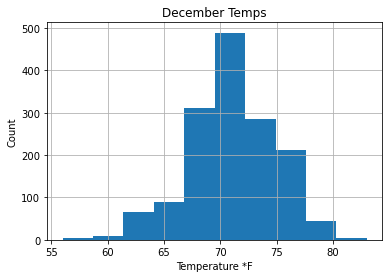

In [70]:
December_temps_list_df.hist()
pl.xlabel("Temperature *F")
pl.ylabel("Count")
pl.savefig("Resources/Dec_hist.png", facecolor='white')

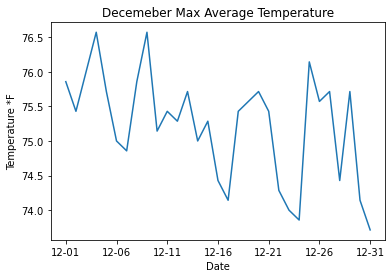

In [71]:
December_temps_df = pd.DataFrame(December_temps)
December_temps_df.columns=["Date", "Temps *F"]


Dec_data = December_temps_df.groupby("Date").max()["Temps *F"]
Dec_data_df = pd.DataFrame(Dec_data).reset_index() 
Dec_data_df["Date"] = Dec_data_df["Date"].map(lambda x : x [5:])
Dec_data_df_avg = Dec_data_df.groupby("Date").mean()["Temps *F"]
Dec_data_df_avg.plot()
pl.ylabel("Temperature *F")
pl.title("Decemeber Max Average Temperature")
pl.savefig("Resources/Dec_Max_Avg.png", facecolor='white')

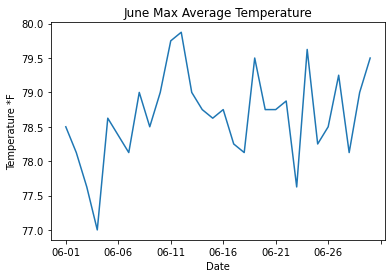

In [72]:
June_temps_df = pd.DataFrame(June_temps)
June_temps_df.columns=["Date", "Temps *F"]


Jun_data = June_temps_df.groupby("Date").max()["Temps *F"]
Jun_data_df = pd.DataFrame(Jun_data).reset_index() 
Jun_data_df["Date"] = Jun_data_df["Date"].map(lambda x : x [5:])
Jun_data_df_avg = Jun_data_df.groupby("Date").mean()["Temps *F"]
Jun_data_df_avg.plot()
pl.ylabel("Temperature *F")
pl.title("June Max Average Temperature")
pl.savefig("Resources/June_Max_Avg.png", facecolor='white')